## **1- Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras import *
from keras.models import*
from sklearn.preprocessing import MinMaxScaler
from keras.layers import *

c:\ProgramData\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **2- read dataset**

In [2]:
energy_df = pd.read_csv("E:/deep leering/energy_consumption.csv")
energy_df.head()

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0


In [3]:
energy_df = pd.read_csv('energy_consumption.csv', index_col = 'Datetime', parse_dates = ['Datetime'])

## **3-Exploratory data analysis**

In [4]:
energy_df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [5]:
energy_df.isnull().sum()

DOM_MW    0
dtype: int64

In [6]:
energy_df.shape

(116189, 1)

## **4-Data Preprocessing**

In [7]:
def scaling(energy_df):
    scaler = MinMaxScaler()
    energy_df['DOM_MW'] = scaler.fit_transform(energy_df['DOM_MW'].values.reshape(-1,1))
    return energy_df

In [8]:
new_df = scaling(energy_df)
new_df.head()

,DOM_MW
Datetime,
2005-12-31 01:00:00,0.398863
2005-12-31 02:00:00,0.383224
2005-12-31 03:00:00,0.379841
2005-12-31 04:00:00,0.381851
2005-12-31 05:00:00,0.386263


In [9]:
#preprocessing of the data
#spliting ofthe data 
def data_preprocessing(data, time_step):
    x_train = []
    y_train = []
    for i in range(time_step, len(data)):
        x_train.append(data.iloc[i - time_step: i, 0])
        y_train.append(data.iloc[i,0])
    
    
    x_test = x_train[110000:]
    y_test = y_train[110000:]
    
    x_train = x_train[:110000]
    y_train = y_train[:110000]
    
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    x_train = np.reshape(x_train, (110000, time_step, 1))
    x_test = np.reshape(x_test, (x_test.shape[0], time_step, 1))
    
    return [x_train, y_train, x_test, y_test]

In [10]:
time_step = 50
x_train, y_train, x_test, y_test = data_preprocessing(energy_df, time_step)

In [11]:
#shapeing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(110000, 50, 1)
(110000,)
(6139, 50, 1)
(6139,)


## **5- model building**

In [12]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40, activation = 'tanh', return_sequences = True, input_shape= (x_train.shape[1], 1)))
rnn_model.add(Dropout(0.15))


rnn_model.add(SimpleRNN(40, activation = 'tanh', return_sequences = True))
rnn_model.add(Dropout(0.15))


rnn_model.add(SimpleRNN(40, activation = 'tanh', return_sequences = True))
rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40, activation = 'tanh', return_sequences = True))
rnn_model.add(Dropout(0.15))


rnn_model.add(SimpleRNN(40, activation = 'tanh', return_sequences = False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

## **6- compile model**

In [13]:
rnn_model.compile(optimizer = 'adam', loss = "MSE")

# **7-fiting model**

In [14]:
rnn_model.fit(x_train, y_train, epochs= 20)

Epoch 1/20
3438/3438 [==============================] - 115s 32ms/step - loss: 0.0228
Epoch 2/20
3438/3438 [==============================] - 105s 30ms/step - loss: 0.0017
Epoch 3/20
3438/3438 [==============================] - 102s 30ms/step - loss: 8.0514e-04
Epoch 4/20
3438/3438 [==============================] - 103s 30ms/step - loss: 6.2524e-04
Epoch 5/20
3438/3438 [==============================] - 104s 30ms/step - loss: 5.7578e-04
Epoch 6/20
3438/3438 [==============================] - 105s 31ms/step - loss: 5.5587e-04
Epoch 7/20
3438/3438 [==============================] - 107s 31ms/step - loss: 5.4076e-04
Epoch 8/20
3438/3438 [==============================] - 108s 31ms/step - loss: 5.3433e-04
Epoch 9/20
3438/3438 [==============================] - 108s 31ms/step - loss: 5.1239e-04
Epoch 10/20
3438/3438 [==============================] - 109s 32ms/step - loss: 5.1087e-04
Epoch 11/20
3438/3438 [==============================] - 102s 30ms/step - loss: 5.1296e-04
Epoch 12/20
3438

# **8-predictig in the model("RNN_model")**

In [15]:
y_pred = rnn_model.predict(x_test)


192/192 [==============================] - 2s 9ms/step


# **9- Visualization ("RNN_model")**

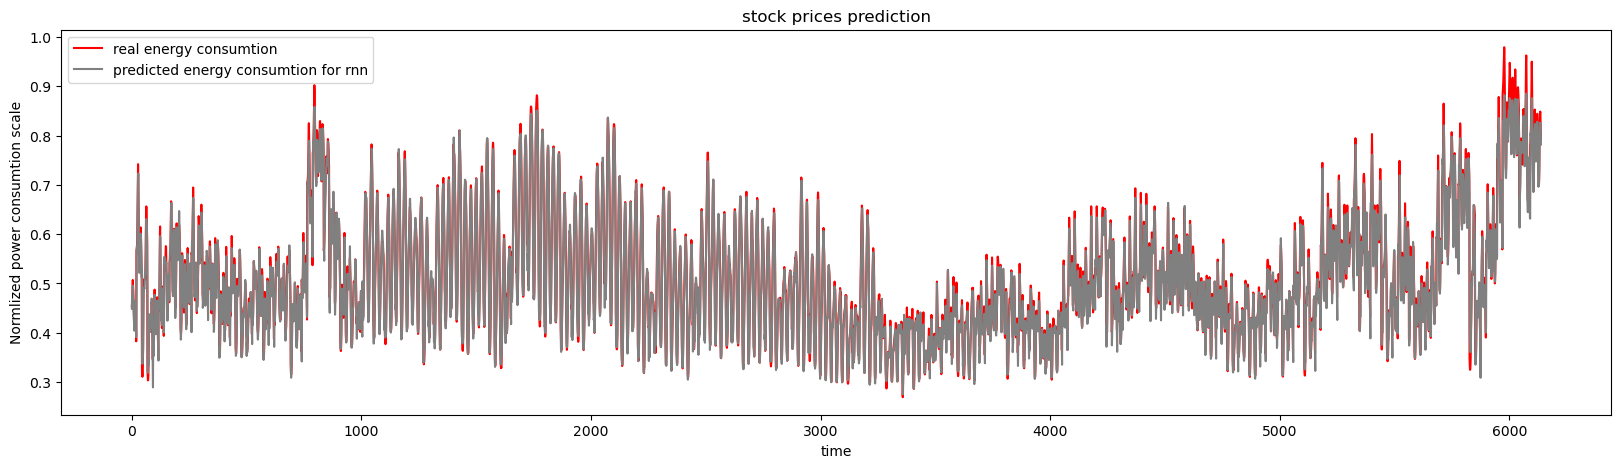

In [16]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label ='real energy consumtion')
plt.plot(y_pred, color = 'grey', label ='predicted energy consumtion for rnn')
plt.title("stock prices prediction")
plt.xlabel("time")
plt.ylabel('Normlized power consumtion scale')
plt.legend()
plt.show()

# **10- model building("LSTM_model")**

In [17]:
lstm_model = Sequential()
lstm_model.add(LSTM(40, activation = 'tanh', return_sequences = True, input_shape= (x_train.shape[1], 1)))
lstm_model.add(Dropout(0.15))


lstm_model.add(LSTM(40, activation = 'tanh', return_sequences = True))
lstm_model.add(Dropout(0.15))


lstm_model.add(LSTM(40, activation = 'tanh', return_sequences = True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40, activation = 'tanh', return_sequences = True))
lstm_model.add(Dropout(0.15))


lstm_model.add(LSTM(40, activation = 'tanh', return_sequences = False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

## **11- compile model**

In [18]:
lstm_model.compile(optimizer = 'adam', loss = "MSE")

#  12- fiting model ("LSTM_Model")

In [19]:
lstm_model.fit(x_train,y_train, epochs=20)

Epoch 1/20
3438/3438 [==============================] - 240s 67ms/step - loss: 0.0043
Epoch 2/20
3438/3438 [==============================] - 220s 64ms/step - loss: 0.0012
Epoch 3/20
3438/3438 [==============================] - 207s 60ms/step - loss: 6.3947e-04
Epoch 4/20
3438/3438 [==============================] - 211s 61ms/step - loss: 5.1706e-04
Epoch 5/20
3438/3438 [==============================] - 217s 63ms/step - loss: 4.7332e-04
Epoch 6/20
3438/3438 [==============================] - 217s 63ms/step - loss: 4.4533e-04
Epoch 7/20
3438/3438 [==============================] - 217s 63ms/step - loss: 4.2514e-04
Epoch 8/20
3438/3438 [==============================] - 211s 61ms/step - loss: 4.1509e-04
Epoch 9/20
3438/3438 [==============================] - 219s 64ms/step - loss: 3.9576e-04
Epoch 10/20
3438/3438 [==============================] - 222s 65ms/step - loss: 3.8796e-04
Epoch 11/20
3438/3438 [==============================] - 225s 65ms/step - loss: 3.7840e-04
Epoch 12/20
3438

# 13- predict model ("LSTM_model")

In [23]:
y_pred_lstm = lstm_model.predict(x_test)
y_pred_lstm

192/192 [==============================] - 4s 23ms/step


array([[0.44803575],
       [0.46848398],
       [0.470068  ],
       ...,
       [0.81899214],
       [0.7880149 ],
       [0.6753462 ]], dtype=float32)

# 14- Visualization ("LSTM_model")

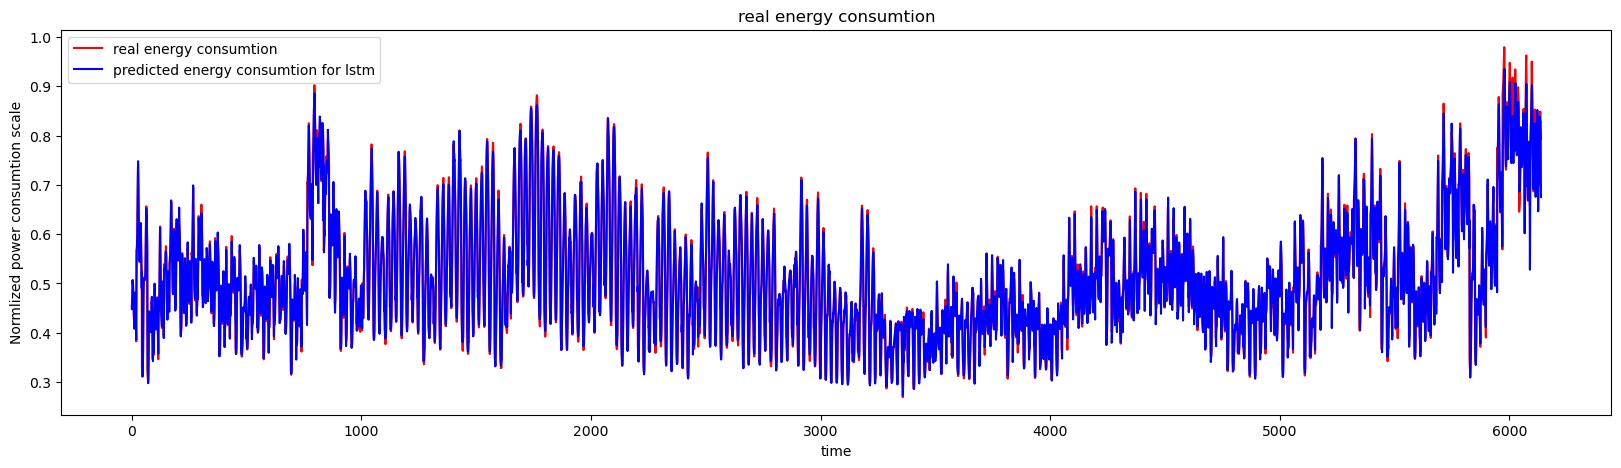

In [21]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label ='real energy consumtion')
plt.plot(y_pred_lstm, color = 'blue', label ='predicted energy consumtion for lstm')
plt.title("real energy consumtion")
plt.xlabel("time")
plt.ylabel('Normlized power consumtion scale')
plt.legend()
plt.show()
